In [49]:
# REF: https://arxiv.org/pdf/0704.1317.pdf

# import libraries
import numpy as np
import scipy
from scipy import interpolate, sparse
import utilsv2 as utils


import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
matrix = np.loadtxt('./generator_matrix_d3.txt')

In [51]:
def create_sparse_matrix(mat,data):
    """
    Creates the generator matrix
    """
    rows = mat.shape[0]
    cols = mat.shape[1]
    row_id = mat.ravel()
    col_id = np.tile(np.arange(cols),rows)
    mat_data = np.repeat(data,cols)
    mat_data = [each*np.random.choice([-1,1]) for each in mat_data]
    
    matrix = sparse.csr_matrix((mat_data, (row_id, col_id)), shape=(cols, cols)).toarray()
    
    return matrix

In [52]:
vals = [1/2.31 , 1/3.17, 1/5.11 , 1/7.33 , 1/11.71]

In [53]:
matrix.shape

(3, 128)

In [54]:
H = create_sparse_matrix(matrix,vals[:3])

In [55]:
H = H/np.abs(np.linalg.det(H))**(1/128.) # normalize H
G = np.linalg.inv(H)

In [70]:
np.random.seed(1234)
b = np.random.randint(10,size = (128,1))
x = np.dot(G,b)

In [71]:
mu, sigma = 0, 0.05 # mean and standard deviation
w = np.random.normal(mu, sigma, x.shape)
y = x + w

In [72]:
x_input = np.linspace(-40.0,40,201)

In [73]:
node = utils.CheckNode(H,x_input,x,sigma)

In [74]:
x_input.shape

(201,)

In [75]:
node.cnode_message.shape

(128, 128, 401)

In [76]:
%%time
result = utils.init_message(x_input, H,y,sigma)
convolution = node.pj(0,28,vnode_message = result,x_in = x_input)
stretch = node.stretch_pj(0,28,vnode_message = result)
# extension = node.periodic_extension(0,28,vnode_message = result)
# q = node.Q(vnode_message=result)

CPU times: user 96.2 ms, sys: 58.8 ms, total: 155 ms
Wall time: 154 ms


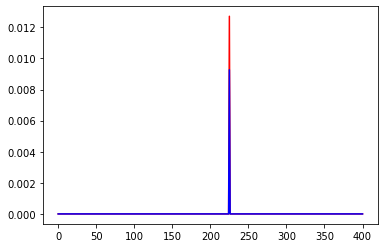

In [78]:
plt.plot(range(len(stretch)),stretch,'r');
plt.plot(range(len(stretch)),convolution,'b');
# plt.plot(range(len(stretch)),extension,'g');
# plt.plot(range(len(stretch)),q[0,28],'c');
# plt.plot(range(len(stretch)),q[0,33],'r');
# plt.plot(range(len(stretch)),q[0,112],'g');

## Testting

In [79]:
node.vnode_id# for each chk node

[[28, 33, 112],
 [6, 40, 125],
 [19, 109, 120],
 [31, 76, 121],
 [98, 109, 114],
 [7, 12, 56],
 [42, 52, 69],
 [88, 99, 104],
 [9, 62, 81],
 [25, 47, 74],
 [94, 115, 120],
 [14, 21, 27],
 [77, 117, 122],
 [4, 49, 63],
 [43, 96, 106],
 [39, 84, 113],
 [17, 36, 86],
 [15, 51, 120],
 [57, 83, 125],
 [9, 24, 84],
 [18, 82, 119],
 [10, 19, 101],
 [48, 70, 111],
 [11, 67, 115],
 [26, 37, 100],
 [45, 69, 81],
 [54, 105, 118],
 [10, 78, 94],
 [30, 46, 105],
 [0, 72, 96],
 [12, 57, 95],
 [42, 105, 124],
 [99, 108, 126],
 [5, 24, 25],
 [28, 67, 91],
 [106, 111, 118],
 [43, 71, 89],
 [15, 63, 80],
 [33, 55, 64],
 [3, 22, 45],
 [16, 94, 97],
 [65, 101, 122],
 [52, 60, 95],
 [27, 30, 47],
 [16, 39, 64],
 [55, 118, 121],
 [9, 68, 87],
 [1, 33, 78],
 [38, 66, 116],
 [11, 25, 26],
 [20, 102, 115],
 [48, 55, 77],
 [22, 44, 97],
 [40, 61, 91],
 [53, 59, 85],
 [5, 29, 79],
 [45, 68, 93],
 [53, 73, 107],
 [54, 62, 92],
 [21, 23, 49],
 [35, 50, 75],
 [44, 58, 82],
 [4, 116, 122],
 [32, 34, 70],
 [73, 85, 1

In [80]:
from IPython import display

def visualize(x,y,z):
    
    plt.plot(x,y,'g',label='before iteration')
    plt.plot(x,z,'r',label = 'after iteration')    
    plt.legend()
    display.clear_output(wait=True)
    #display.display(plt.gcf())
    plt.show();

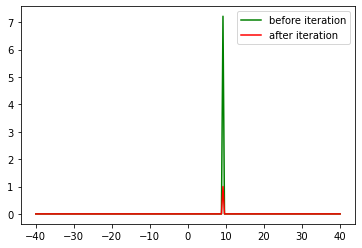

1082.086540504832 384.0
iter0: 6.21936310223195


In [ ]:
%%time
cnode = utils.CheckNode(H,x_input,x,sigma)
vnode = utils.VariableNode(H,x_input,x,sigma)
res = utils.init_message(x_input, H,x,sigma)
for i in range(2):
    q = cnode.Q(res)
    f = vnode.f(q)
    visualize(x_input,res[0][28],f[0][28])
    print (res.sum() , f.sum())
    print (f'iter{i}:',res[0][28].max()-f[0][28].max())
    res = f
plt.clf(); 

In [ ]:
f_final = vnode.final(q)
x_b = np.argmax(f_final,axis = 1)
b_cal = np.rint(np.dot(H,x_input[x_b]))
        
print (b_cal.astype(int),b.ravel())


In [ ]:
np.array_equal(b_cal.astype(int), b.ravel()) 

array([[3],
       [6],
       [5],
       [4],
       [8],
       [9],
       [1],
       [7],
       [9],
       [6]])